In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.decomposition import PCA
from bilinear_model import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams['font.size'] = 16

In [2]:
mean_df = pd.read_csv("connection_matrix_mean.csv", index_col = 0)
var_df = pd.read_csv("connection_matrix_var.csv", index_col = 0)

In [3]:
mean_df = mean_df.rename(index={'xbc': 'bc5xbc'})
mean_df = mean_df.sort_index().sort_index(axis=1)
var_df = var_df.rename(index={'xbc': 'bc5xbc'})
var_df = var_df.sort_index().sort_index(axis=1)

In [4]:
with open('rgc_df_gene_selected.pkl', 'rb') as f:
    rgc_df = pickle.load(f)
rgc_df_all = rgc_df.copy()
rgc_df_all

_index,GM37381,RP1,MRPL15,RGS20,NPBWR1,4732440D04RIK,GM26901,MYBL1,VCPIP1,SNHG6,...,GM28510,GM20831,GM20792,GM21209,GM29082,GM29564,GM21760,GM21409,GM20820,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
25,0.0,0.0,0.000000,0.849207,0.0,0.0,0.0,0.0,0.849207,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.301712
3,0.0,0.0,0.000000,1.146473,0.0,0.0,0.0,0.0,0.729256,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
28,0.0,0.0,0.658763,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
28,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.571013,0.571013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
14,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.589141,0.957386,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.589141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,0.333000,0.333000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
15,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.420690,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420690


In [5]:
df = pd.read_csv("RGC_type_correspondence_combined.csv")
df

,Goetz et al. (2022) Type,Bae et al. (2018) Eyewire type,Tran et al. (2019) Cluster
0,ON sus alpha,8w,C43
1,OFFhOS,2aw,C9
2,OFFvOS,2aw,C5
3,ON tr SmRF,6sn,C30
4,OFF tr alpha,4ow,C45
5,OFF tr SmRF,4i,C21
6,ONhOS SmRF,82wi,C27
7,ONhOS LgRF,82n/wo,C36
8,ONvOS SmRF,72,C38
9,"ON DS sus DN, T, V",7iv/r/d,C10


In [6]:
# Initialize an empty dictionary
rgc_map = {}

# Iterate over the rows of the dataframe
for index, row in df.iterrows():
    # Extract the value and key from the row
    value = row['Bae et al. (2018) Eyewire type']
    key = row['Tran et al. (2019) Cluster']
    
    # Extract the number from the 'key' column
    key_number = int(key[1:])
    
    # Adjust the key number by subtracting 1
    adjusted_key = key_number - 1
    
    # Add the key-value pair to the dictionary
    rgc_map[adjusted_key] = value

# Print the resulting dictionary
print(rgc_map)

{42: '8w', 8: '2aw', 4: '2aw', 29: '6sn', 44: '4ow', 20: '4i', 26: '82wi', 35: '82n/wo', 37: '72', 9: '7iv/r/d', 15: '37v', 23: '37r', 12: '5si', 5: '5so', 1: '5ti', 10: '51', 2: '63', 13: '73', 17: '3i', 24: '2o', 25: '27', 30: '9w', 41: '1wt', 11: '37c', 3: '2an', 40: '6sw'}


In [7]:
# Annotate data
rgc_df = rgc_df[rgc_df.index.isin(rgc_map.keys())]
rgc_df = rgc_df.rename(index = rgc_map)
rgc_df

_index,GM37381,RP1,MRPL15,RGS20,NPBWR1,4732440D04RIK,GM26901,MYBL1,VCPIP1,SNHG6,...,GM28510,GM20831,GM20792,GM21209,GM29082,GM29564,GM21760,GM21409,GM20820,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
27,0.0,0.0,0.000,0.849207,0.0,0.0,0.0,0.0,0.849207,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.301712
2an,0.0,0.0,0.000,1.146473,0.0,0.0,0.0,0.0,0.729256,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
37c,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.822634,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.822634
37r,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.986616,0.514533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3i,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.945292,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7iv/r/d,0.0,0.0,0.333,0.333000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
63,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
37v,0.0,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.420690,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420690


In [8]:
# Standardization
scaler = StandardScaler()
rgc_df_values = scaler.fit_transform(rgc_df.values)
rgc_df_values

array([[-0.00897007, -0.03887754, -0.27154679, ...,  0.        ,
        -0.00667379,  2.90979648],
       [-0.00897007, -0.03887754, -0.27154679, ...,  0.        ,
        -0.00667379, -0.54026098],
       [-0.00897007, -0.03887754, -0.27154679, ...,  0.        ,
        -0.00667379,  1.64004622],
       ...,
       [-0.00897007, -0.03887754, -0.27154679, ...,  0.        ,
        -0.00667379,  0.57473629],
       [-0.00897007, -0.03887754, -0.27154679, ...,  0.        ,
        -0.00667379, -0.54026098],
       [-0.00897007, -0.03887754, -0.27154679, ...,  0.        ,
        -0.00667379,  1.3582916 ]])

In [9]:
with open('bc_df_gene_selected.pkl', 'rb') as f:
    bc_df = pickle.load(f)
bc_df_all = bc_df.copy()
bc_df_all

_index,XKR4,RP1,SOX17,RGS20,4732440D04RIK,GM26901,SNTG1,MYBL1,PPP1R42,CPA6,...,MID1,GM21887,ASMT,ZFY1,USP9Y,GM21704,KDM5D,GM29650,GM28919,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
6,1.708522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
5,2.684568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
14,1.176548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.176548,0.0,0.0,0.000000
14,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.850446
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1.087015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.087015,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
8,2.510073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
14,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.092912,0.0,0.0,1.092912


In [10]:
bc_map = {
    0:"bc1",
    1:"bc1",
    2:"bc2",
    3:"bc3a",
    4:"bc3b",
    5:"bc4",
    6:"bc5i",
    7:"bc5o",
    8:"bc5t",
    #9:"xbc",
    9:"bc5xbc",
    10:"bc6",
    11:"bc7",
    12:"bc8/9",
    13:"bc8/9",
}

In [11]:
# Annotate data
bc_df = bc_df[bc_df.index.isin(bc_map.keys())]
bc_df = bc_df.rename(index = bc_map)
bc_df

_index,XKR4,RP1,SOX17,RGS20,4732440D04RIK,GM26901,SNTG1,MYBL1,PPP1R42,CPA6,...,MID1,GM21887,ASMT,ZFY1,USP9Y,GM21704,KDM5D,GM29650,GM28919,GM47283
annotated,,,,,,,,,,,,,,,,,,,,,
bc5i,1.708522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
bc4,2.684568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
bc1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
bc3b,1.191177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,1.191177,0.0,0.0,2.318833
bc1,2.059829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
bc5o,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.290093
bc3b,1.087015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.087015,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
bc5t,2.510073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [12]:
# Standardization
scaler = StandardScaler()
bc_df_values = scaler.fit_transform(bc_df.values)
bc_df_values

array([[ 1.04902692, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ],
       [ 2.03041594, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ],
       [-0.66884696, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ],
       ...,
       [ 1.85496487, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ],
       [-0.66884696, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ],
       [-0.66884696, -0.07242193, -0.03064139, ..., -0.05391957,
        -0.01626931, -0.64934   ]])

In [13]:
def pca_replicate_rgc(rgc_df_values):
    # Perform PCA
    pca = PCA(n_components=rgc_df.shape[1])
    pca.fit(rgc_df_values)

    # Calculate cumulative explained variance ratios
    variance_ratios = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(variance_ratios)

    # Find the number of components that explain at least 95% variance
    num_components = np.argmax(cumulative_variance >= 0.95)
    explained_variance = cumulative_variance[num_components]

    print(f"Number of components explaining at least 95% variance: {num_components+1}")
    print(f"Explained variance: {explained_variance}")

    # Transform data into PC space using the selected number of components
    rgc_df_pca = pd.DataFrame(pca.transform(rgc_df_values)[:, :num_components+1], index=rgc_df.index)

    # Output
    rgc_pca_components = pca.components_[:num_components+1].T
    rgc_mean_df = rgc_df_pca.groupby(rgc_df_pca.index).mean()
    rgc_mean_df = rgc_mean_df.sort_index().sort_index(axis=1)
    rgc_var = rgc_df_pca.groupby(rgc_df_pca.index).var().sum()
    rgc_mean_df = rgc_mean_df/np.sqrt(rgc_var)
    return rgc_mean_df, rgc_pca_components

In [14]:
def pca_replicate_bc(bc_df_values):
    # Perform PCA
    pca = PCA(n_components=bc_df.shape[0])
    pca.fit(bc_df_values)

    # Calculate cumulative explained variance ratios
    variance_ratios = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(variance_ratios)

    # Find the number of components that explain at least 95% variance
    num_components = np.argmax(cumulative_variance >= 0.95)
    explained_variance = cumulative_variance[num_components]

    print(f"Number of components explaining at least 95% variance: {num_components+1}")
    print(f"Explained variance: {explained_variance}")

    # Transform data into PC space using the selected number of components
    bc_df_pca = pd.DataFrame(pca.transform(bc_df_values)[:, :num_components+1], index=bc_df.index)

    # Output
    bc_pca_components = pca.components_[:num_components+1].T
    bc_mean_df = bc_df_pca.groupby(bc_df_pca.index).mean()
    bc_mean_df = bc_mean_df.sort_index().sort_index(axis=1)
    bc_var = bc_df_pca.groupby(bc_df_pca.index).var().sum()
    bc_mean_df = bc_mean_df/np.sqrt(bc_var)
    return bc_mean_df, bc_pca_components

In [15]:
opt_d = 2
opt_l = 1

In [16]:
As = []
Bs = []
for i in range(5):
    random.seed(10)
    rgc_mean_df, rgc_pca_components = pca_replicate_rgc(rgc_df_values)
    bc_mean_df, bc_pca_components = pca_replicate_bc(bc_df_values)
    A_est, B_est, loss = transformed_gradient_descent_output_loss(Z = mean_df.values, X = bc_mean_df.values, Y = rgc_mean_df.values, n_factors = opt_d, n_iterations=1000000, learning_rate=0.000001/opt_d, lambda_a=opt_l, lambda_b=opt_l, verbose = False, tol=1e-8)
    As.append(np.dot(bc_pca_components, A_est))
    Bs.append(np.dot(rgc_pca_components, B_est))

Number of components explaining at least 95% variance: 11323
Explained variance: 0.9500077086158456
Number of components explaining at least 95% variance: 3142
Explained variance: 0.9500993273299987
Number of components explaining at least 95% variance: 11323
Explained variance: 0.9500077086158456
Number of components explaining at least 95% variance: 3142
Explained variance: 0.9500993273299987
Number of components explaining at least 95% variance: 11323
Explained variance: 0.9500077086158456
Number of components explaining at least 95% variance: 3142
Explained variance: 0.9500993273299987
Number of components explaining at least 95% variance: 11323
Explained variance: 0.9500077086158456
Number of components explaining at least 95% variance: 3142
Explained variance: 0.9500993273299987
Number of components explaining at least 95% variance: 11323
Explained variance: 0.9500077086158456
Number of components explaining at least 95% variance: 3142
Explained variance: 0.9500993273299987


In [17]:
A_array = np.array(As)
B_array = np.array(Bs)

In [18]:
import numpy as np
from scipy.spatial.distance import cosine

def calculate_cosine_similarity(A, B):
    """Calculate absolute cosine similarity between corresponding columns of two matrices."""
    cos_sim_1 = abs(1 - cosine(A[:, 0], B[:, 0]))  # for first latent dimension
    cos_sim_2 = abs(1 - cosine(A[:, 1], B[:, 1]))  # for second latent dimension
    return (cos_sim_1 + cos_sim_2) / 2  # average

def compare_solutions(As):
    n = len(As)  # Number of solutions
    similarity_matrix = np.ones((n, n))

    for i in range(n):
        for j in range(n):
            if i != j:
                # Original vector pairing
                original_similarity = calculate_cosine_similarity(As[i], As[j])

                # Swapped vector pairing
                swapped_similarity = calculate_cosine_similarity(As[i][:, [0, 1]], As[j][:, [1, 0]])

                # Taking the maximum of the two average absolute cosine similarities
                similarity_matrix[i, j] = max(original_similarity, swapped_similarity)

    return similarity_matrix

[[1.         0.78071325 0.84069897 0.87203353 0.86191072]
 [0.78071325 1.         0.84896836 0.76896728 0.81941484]
 [0.84069897 0.84896836 1.         0.8365774  0.86274799]
 [0.87203353 0.76896728 0.8365774  1.         0.8622791 ]
 [0.86191072 0.81941484 0.86274799 0.8622791  1.        ]]


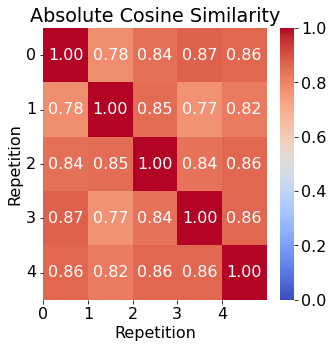

In [19]:
consistency_matrix = compare_solutions(A_array)
print(consistency_matrix)
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.heatmap(consistency_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin = 0, vmax = 1.0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.xticks(range(5), range(5))
plt.xlabel('Repetition')
plt.ylabel('Repetition')
plt.title ('Absolute Cosine Similarity')
plt.savefig('figure2_rep_a.svg', format='svg', bbox_inches='tight')

[[1.         0.77767183 0.8423254  0.86847913 0.86502706]
 [0.77767183 1.         0.85179172 0.77048053 0.81584531]
 [0.8423254  0.85179172 1.         0.83826843 0.86153268]
 [0.86847913 0.77048053 0.83826843 1.         0.8621937 ]
 [0.86502706 0.81584531 0.86153268 0.8621937  1.        ]]


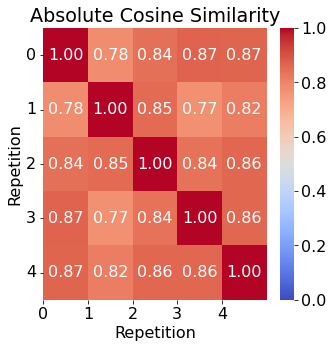

In [20]:
consistency_matrix = compare_solutions(B_array)
print(consistency_matrix)
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
ax = sns.heatmap(consistency_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin = 0, vmax = 1.0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.xticks(range(5), range(5))
plt.xlabel('Repetition')
plt.ylabel('Repetition')
plt.title ('Absolute Cosine Similarity')
plt.savefig('figure2_rep_b.svg', format='svg', bbox_inches='tight')